In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/F1/"

lap_times = pd.read_csv(data_path + "lap_times.csv")
pit_stops = pd.read_csv(data_path + "pit_stops.csv")
results = pd.read_csv(data_path + "results.csv")
races = pd.read_csv(data_path + "races.csv")
drivers = pd.read_csv(data_path + "drivers.csv")
constructors = pd.read_csv(data_path + "constructors.csv")

Mounted at /content/drive


In [4]:
print("Lap Times:", lap_times.shape)
print("Pit Stops:", pit_stops.shape)
print("Results:", results.shape)

Lap Times: (589081, 6)
Pit Stops: (11371, 7)
Results: (26759, 18)


In [10]:
df = pit_stops.merge(results, on=["raceId","driverId"], how="left")
df = df.merge(drivers, on="driverId", how="left")
df = df.merge(constructors, on="constructorId", how="left")
df = df.merge(races, on="raceId", how="left")

In [11]:
# Use milliseconds_x (from pit_stops.csv)
df["num_pitstops"] = df.groupby(["raceId","driverId"])["stop"].transform("count")
df["avg_pit_duration"] = df.groupby(["raceId","driverId"])["milliseconds_x"].transform("mean")
df["first_pit_lap"] = df.groupby(["raceId","driverId"])["lap"].transform("min")

In [12]:
# Use grid position, constructor, driver as features
features = ["grid", "num_pitstops", "avg_pit_duration", "first_pit_lap", "constructorId"]

# Encode categorical (constructor, driver)
le = LabelEncoder()
df["constructor_encoded"] = le.fit_transform(df["constructorRef"])

X = df[["grid","num_pitstops","avg_pit_duration","first_pit_lap","constructor_encoded"]]
y = df["positionOrder"]

In [13]:
mask = ~y.isna()
X, y = X[mask], y[mask]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

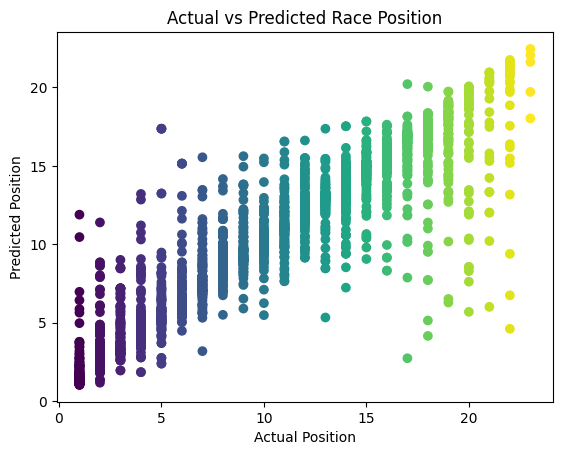

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 1.3948600732600733
R² Score: 0.8248889668050374


In [ ]:
feat_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

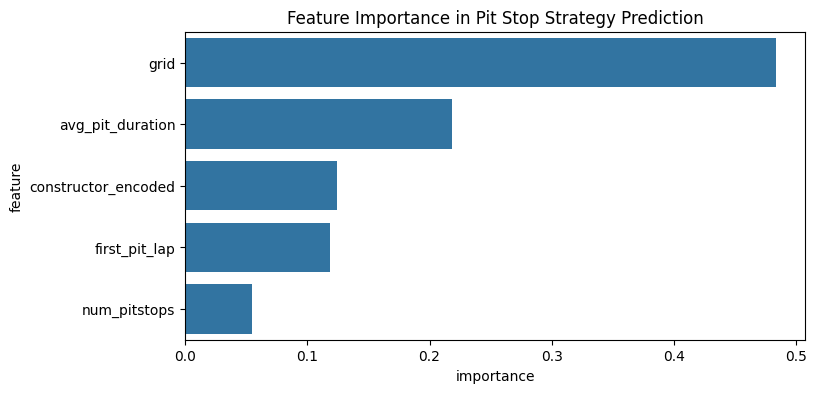

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x="importance", y="feature", data=feat_importance)
plt.title("Feature Importance in Pit Stop Strategy Prediction")
plt.show()

In [ ]:
pd.DataFrame(y_pred,y_test)

,0
positionOrder,
2,2.220
13,8.465
19,6.515
8,7.315
4,5.625
...,...
9,8.995
15,14.425
2,4.675


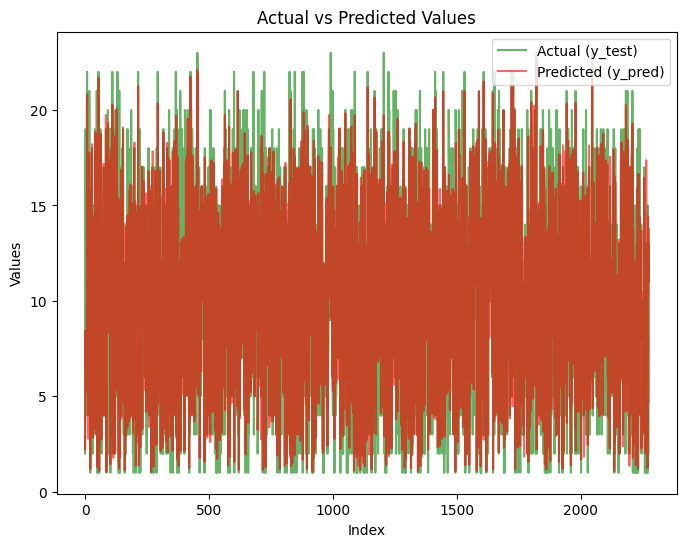

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.plot(range(len(y_test)), y_test, color='green', label='Actual (y_test)', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted (y_pred)', alpha=0.6)

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [ ]:
import joblib

joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/F1/f1_pitstop_model.pkl")
loaded_f1_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/F1/f1_pitstop_model.pkl")
predictions = loaded_f1_model.predict(X_test)

In [ ]:
predictions

array([ 2.22 ,  8.465,  6.515, ...,  4.675, 13.795, 11.065])

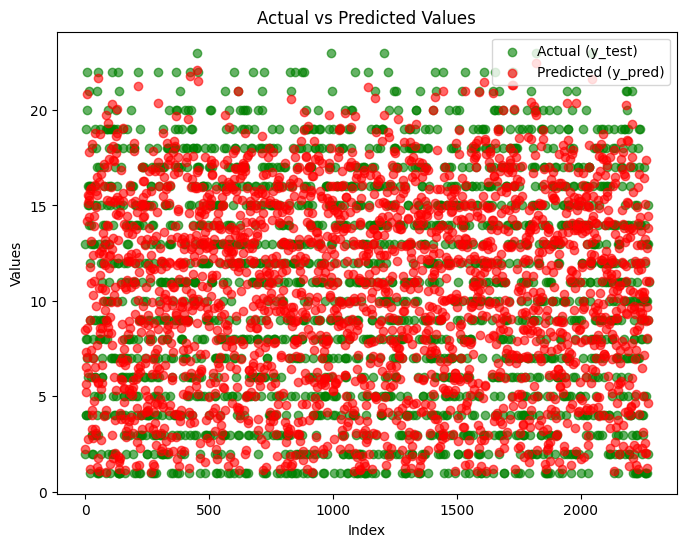

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual (y_test)', alpha=0.6)
plt.scatter(range(len(predictions)), y_pred, color='red', label='Predicted (y_pred)', alpha=0.6)

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


In [ ]:
y_test.head(10)

,positionOrder
3495,2
9225,13
9085,19
11106,8
1803,4
9614,4
10556,7
2199,20
4685,22
6975,8


In [ ]:
for i in y_test["positionOrder"]:
  if y_test["positionOrder"] == 1:
    print("")

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,resultId,constructorId,number_x,...,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,num_pitstops,avg_pit_duration,first_pit_lap,constructor_encoded
6,841,20,1,14,17:25:17,22.603,22603,20779,9,1,...,\N,\N,\N,\N,\N,\N,2,23319.500000,14,17
32,841,20,2,36,17:59:17,24.036,24036,20779,9,1,...,\N,\N,\N,\N,\N,\N,2,23319.500000,14,17
50,842,20,1,13,16:26:17,23.019,23019,20801,9,1,...,\N,\N,\N,\N,\N,\N,3,22408.333333,13,17
74,842,20,2,25,16:47:27,21.893,21893,20801,9,1,...,\N,\N,\N,\N,\N,\N,3,22408.333333,13,17
96,842,20,3,41,17:15:08,22.313,22313,20801,9,1,...,\N,\N,\N,\N,\N,\N,3,22408.333333,13,17


In [ ]:
# Create a DataFrame of predictions with the same index as X_test
predictions_df = pd.DataFrame(y_pred, index=X_test.index, columns=["predicted_position"])

# Merge the original dataframe with the predictions based on index
df_with_predictions = df.loc[X_test.index].copy()
df_with_predictions["predicted_position"] = predictions_df["predicted_position"]

# Filter for predicted positions around 1 and get the first 5 rows
first_position_predicted_drivers = df_with_predictions[df_with_predictions["predicted_position"] < 1.5].head(5)
display(first_position_predicted_drivers)

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,resultId,constructorId,number_x,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,num_pitstops,avg_pit_duration,first_pit_lap,constructor_encoded,predicted_position
9459,1092,830,1,2,14:08:39,6:27.399,387399,25746,9,1,...,03:00:00,2022-10-08,06:00:00,\N,\N,2,2.058535e+05,2,17,1.195
3082,901,1,2,33,17:03:18,25.296,25296,22152,131,44,...,\N,\N,\N,\N,\N,3,2.479467e+04,15,14,1.300
10159,1111,830,5,63,16:30:26,20.402,20402,26086,9,1,...,09:30:00,2023-08-26,13:00:00,\N,\N,6,4.302645e+05,2,17,1.080
9761,1100,830,3,57,17:02:10,30:56.502,1856502,25886,9,1,...,01:30:00,2023-04-01,05:00:00,\N,\N,3,1.216457e+06,8,17,1.055
3412,909,3,2,41,15:01:08,20.257,20257,22328,131,6,...,\N,\N,\N,\N,\N,2,2.015600e+04,15,14,1.445


In [9]:
import joblib
loaded_f1_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/F1/f1_pitstop_model.pkl")

In [24]:
X_test[50:55]

,grid,num_pitstops,avg_pit_duration,first_pit_lap,constructor_encoded
5434,3,1,21775.000000,12,17
8881,1,3,24717.333333,15,5
8224,5,1,23874.000000,30,13
3468,6,3,22413.333333,8,22
218,20,4,37493.250000,15,8


In [27]:
y_test[100:115]

,positionOrder
8316,15
11280,16
3412,1
8643,10
1825,19
8412,16
6964,7
7342,7
8387,12
3098,2


In [31]:
loaded_f1_model.predict(X_test[100:115])

array([12.4  ,  9.15 ,  1.445,  9.92 , 17.95 , 15.945,  8.3  ,  7.675,
       12.695,  2.965, 20.295, 17.37 , 18.125, 13.295,  1.775])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = loaded_f1_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.39
Root Mean Squared Error: 2.40
R² Score: 0.82


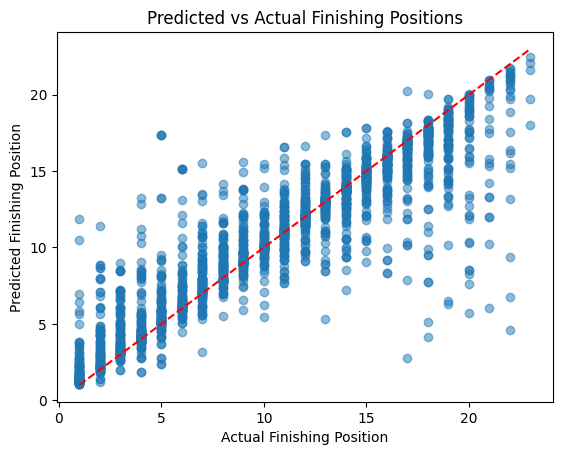

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Finishing Position")
plt.ylabel("Predicted Finishing Position")
plt.title("Predicted vs Actual Finishing Positions")
plt.show()

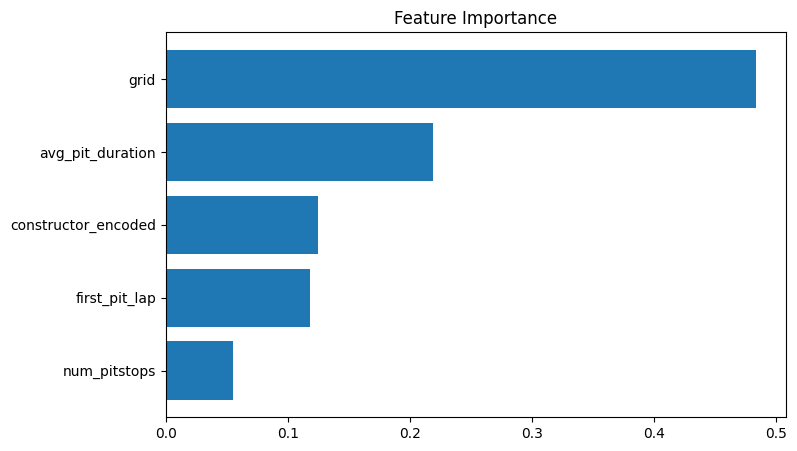

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = loaded_f1_model.feature_importances_
features = X_train.columns

fi_df = pd.DataFrame({"feature": features, "importance": feature_importance})
fi_df = fi_df.sort_values("importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()